# Capítulo 2 - Soluções de equações em uma variável #

Os métodos numéricos discutidos neste capítulo visam aproximar soluções para equações de uma variável quando as soluções exatas destas equações não podem ser obtidas através de métodos algébricos (solução explícita), como é o caso da equação $90000 e^{\lambda} + \frac{10500}{\lambda} (e^{\lambda} -1) - 125000 = 0$.

Estes métodos utilizam teoremas matemáticos para criar algoritmos iterativos que convergem para a solução da equação quando os parâmetros iniciais são adequadamente escolhidos. Cada método apresentado neste capítulo possui suas especificidades e critérios de convergência.

Os métodos serão implementados para resolver uma das questões mais básicias da aproximação numérica: a determinação de raízes (ou zeros) de uma função do tipo $f(x) = 0$.

## Método da Bissecção #

Em computação, os processos que usam da técnica de divisão contínua de conjuntos ao meio para obter um resultado são chamados de procedimentos de busca binária. O Método da Bissecção é um desses procedimentos, e baseia-se no **Teorema do Valor Intermediário** para buscar a raiz de uma função em um determinado intervalo $[a,b]$ através de sucessivas subdivisões deste. 

---
<p style="text-align: center;">**Teorema do Valor Intermediário**</p>

Supondo que $f$ é uma função contínua definida no intervalo $[a, b]$, e que $f(a)$ e $f(b)$ possuem sinais opostos, ou seja, $f(a) . f(b) < 0$, então existirá pelo menos um número $p$ em $(a, b)$ com $f(p) = 0$. 

---

O Método da Bissecção inicia com a definição de um intervalo $[a, b]$ para o qual uma determinada função $f$ atenda aos critérios do teorema do valor intermediário, garantindo assim a existência de uma raiz da equação $f(x)=0$.

Definido tal intervalo calcula-se o valor da função $f(x)$ em seu ponto médio $(p)$, sendo:

$${p}={a}_{n}+\frac{{b}_{n}-{a}_{n}}{2}=\frac{{a}_{n}+{b}_{n}}{2}$$.

a cada subdivisão, o ponto médio do intervalo, $p$, é testado, podendo uma das 3 seguintes situações ocorrer:

<p style="text-align: center;"> 1. $f(p)=0$; </p>
<p style="text-align: center;"> 2. $f(p)>0$; </p>
<p style="text-align: center;"> 3. $f(p)<0$. </p>

A ocorrência da situação 1 (ou se atende aos critérios de tolerância estabelecidos) significa que $p$ é a raiz da equação $f(x)=0$ e o método é encerrado. Já as situações 2 e 3 indicam a necessidade de uma nova iteração que avalie os pontos $a$, $b$, e o ponto médio entre eles, $p$: se $f(a) . f(p) < 0$ significa que a raiz da função está no intervalo $[a_n,b_n]=[a, p]$. Neste caso, $a_n$ mantém o valor de $a$ e $b_n$ assume o valor de $p$; caso o contrário, se $f(p) . f(b) < 0$, $a_n$ assume o valor de $p$ e $b_n$ mantém o valor de $b$.

Como o intervalo $[{a}_{n}, {b}_{n}]$ atende aos critérios do Teorema do Valor Intermediário, a cada iteração $n$ o intervalo estudado vai fechando em direção à raiz, até que o ponto $p$ resulte em $f(p) = 0$ ou que os critérios de tolerância sejam atendidos para uma aproximação considerada suficientemente boa ($f(p) \approx 0$ ou outro critério de parada do método). 

O método da bisseccção pode adotar diversos critérios de parada. Alguns deles são:

* $\frac{{b}_{n}-{a}_{n}}{2}<\varepsilon$ (tamanho limite da bissecção do intervalo $[{a}_{n}, {b}_{n}]$ após $n$ iterações)

* $\left|{p}_{n}-{p}_{n-1}\right|<\varepsilon$

* $\frac{\left|{p}_{n}-{p}_{n-1}\right|}{{p}_{n}}<\varepsilon$, com ${p}_{n}\neq0$ (seu uso é o mais indicado, por se aproximar de um erro relativo)

* $\left|f({p}_{n})\right|<\varepsilon$

* $n>N_0$ ($n$ atingiu o número máximo de iterações $N_0$. Comumente usado para evitar loops infinitos em métodos iterativos que não convergem)

---

<p style="text-align: center;"> **Teorema - limitante para o erro de aproximação no método da Bissecção** </p>

Sejam $f \in C[a, b]$ e $f(a).f(b)<0$, o método da Bissecção gera uma sequência $\left \{ {p}_{n} \right \}_{n=1}^{\infty}$ que se aproxima de um zero $p$ de $f$ com $$\left|{p}_{n}-{p}\right| \leqslant  \frac{b-a}{2^{n}}\textrm{, quando n}\geqslant 1$$
**Demonstração:**

![Teorema_2_1](https://lh3.googleusercontent.com/_FFpatuJfuNL_cEpb7gg_bwrAq3MJ5km93j_FArpcJ42LhzeFP3m2zmREekOTec-5wu7ACc0JmY03oK9HaqcT9TEVWLn3otczck9dmxTlbuSNi-GecizvgRqbA2DCWoR6lTMONXHE1_x8RzaaazmWewsAGazGK0ns4PXf8PwGIBlt_lG2detMNWfQWHKXHokZrj_mv1ixECIrNw_HEjpNwUk2ijqMGnp1w5B6D8JTW3pdKpmRFGza7JcQVBicPnbyhPSYk0DDyQYXDumo_VhOJE7M4i0HxNkBq1ajTfvzBJBv6e5G4Y77F-4Qi59WanvW_x_fTKF0ZNEvaXE-4AOhfQurer0Sy2X-a4c-fb4uQvkdKLCOeqPT82lyzMljnEfoSlp87bxTyqusW2aC3bCXtWAnP6N5DaRRJ6TiyIdrD79__WRLp9Vsqk7BkTNZPqvWMWZqn5IkVJMM1JbwtrNdbMk8UsxLBdROapWqLqh74ddqqsRGPXol6uogU1FvnWnf-nGzJoSnthcZF6uGi8-Pstb881bBA4Rr9EeoRwHooyO96QpiUpyigjneDEOd2mLrfUFq1NxNhYb9fL1ArCQ7-6C48S8mk__AkQAop9rRpu9g5-jm3f13mZxDTNGXoizIfaQau9A7L2cUUh35fyIf820vcRLVZho=w273-h143-no)

Ou seja, a raiz $p$ sempre estará no intervalo $[{a}_{n}, {p}_{n}]$ ou $[{p}_{n}, {b}_{n}]$ (ou no máximo em um dos extremos: ${a}_{n}=p$; ou ${b}_{n}=p$; ou $p={p}_{n}$). Pode-se escrever: $$\left|{p}_{n}-{p}\right| \leqslant  \frac{{b}_{n}-{a}_{n}}{2}\textrm{, para todo n}\geqslant 1,$$como: $$\frac{{b}_{n}-{a}_{n}}{2} = \frac{b-a}{2^{n}},$$a equação fica: $$\left|{p}_{n}-{p}\right| \leqslant (b-a)\frac{1}{2^{n}}$$.

Esta equação pode ser escrita como uma equação de taxa de convergência $\left|{\alpha}_{n}-{\alpha}\right| \leqslant K\left| {\beta}_{n}\right| \therefore {\alpha}_{n} = \alpha + O({\beta}_{n})$. Assim a sequência $\left \{ {p}_{n} \right \}_{n=1}^{\infty}$ converge para a raiz $p$ com uma taxa de convergência de $O(\frac{1}{2^n})$, ou seja: $${p}_{n} = p + O(\frac{1}{2^{n}})$$

como exemplo: $$\left|{p}_{9}-{p}\right| \leqslant  \frac{2-1}{2^{9}} \approx 2 x 10^{-3},$$é o limitante (erro máximo) para o método da bissecção com 9 iterações e $a=1$ e $b=2$.

---

### Vantagem do Método da Bissecção #

A maior vantagem da utilização deste método para buscar a solução de uma equação do tipo $f(x)=0$ é que, atendidas as condições estabelecidas para sua aplicação, a convergência para uma solução é garantida. Por esse motivo importante, este método é bastante utilizado como um primeiro passo na busca por uma solução.

### Desvantagens do Método da Bisseção #

O Método da Bissecção possui algumas desvantagens notáveis quando comparado com outros métodos, sendo as mais importantes:

* Convergência lenta

Quando comparado a outros métodos, este método costuma precisar de uma quantidade maior de iterações para alcançar um resultado satisfatório e com uma boa precisão. 

Observe que, como destacado anteriormente, a sequência {$p_n$}$_{n=1}^\infty$ converge para o valor da raiz $p$, com uma taxa de convergência de O$(\frac{1}{2^n})$. Quando comparamos com a sequência ${(\beta_n)}_{n=1}^{\infty}$ definida na seção "Convergência" do capítulo anterior, percebemos que o valor aqui assumido pela variável n é baixo (2), o que indica uma baixa taxa de convergência para o resultado.

$$Colocar \, um \,  exemplo \, de \, convergência \, lenta$$

* Resultados interessantes para o problema podem ser descartados

Devido à maneira como o método funciona, e às suas condições iniciais e critérios de parada, é possível que soluções com erros menores sejam descartadas. Uma outra possibilidade é quando há mais de uma solução no intervalo, sendo uma delas ignorada durante as iterações.

$$Colocar \, um \,  exemplo \, de \, função \, trigonométrica$$

* Limitação da aplicação do método 

O método da Bissecção falha para uma equação que não troca de sinal em sua imagem, ou seja, que o seu gráfico não cruza o eixo x, mas somente o tangencia nos pontos da suas raízes. Exemplos destas equações são $f(x)=3x^{4}$ e $g(x)=-2x^{2}$.

$$Colocar \, um \, exemplo$$

* Sensibilidade quanto ao intervalo escolhido

Como o método trabalha com sucessivas subdivisões de um intervalo, a escolha do intervalo inicial possui um impacto considerável no número de iterações que serão necessárias para se chegar a um resultado preciso. Além disso, escolhendo-se um intervalo que contenha mais de uma raiz, o método ignorará pelo menos uma delas.

$$Colocar \, um \,  exemplo$$

### Observações quanto à aplicação do Método da Bissecção #

Critérios de parada e tamanho do intervalo escolhido

### Implementação do método da Bissecção em linguagem Python #

O programa abaixo implementa o método da Bissecção para a obtenção de uma raiz de uma função, gerando uma tabela com os parâmetros do método nas sucessivas subdivisões do intervalo $[a, b]$ que contém a raiz, e a ilustração gráfica do método, representando a função (linha verde) e as subdivisões do intervalo $[a, b]$ em linhas azuis e vermelhas.

Adicionar vantagens e desvantagens do método da bissecção. Um dos problemas do método da bissecção é que ele pode ignorar uma raiz, por exemplo. Conselhos para otimização.

In [ ]:
#Método da Bissecção para determinar uma raiz de uma função em uma variável do tipo f(x) = 0

#Utiliza a biblioteca sympy, disponível em: http://docs.sympy.org/latest/index.html
#Utiliza a biblioteca matplotlib, disponível em: https://matplotlib.org/

import sympy as sp
import matplotlib.pyplot as plt

def f(a, x, fx): #Retorna o valor numérico da função digitada pelo usuário
    return float(fx.subs(x, a))

x = sp.symbols('x')
fx = sp.sympify(input("Digite a função f(x): "))

TOL = abs(float(input("Tolerância para o tamanho do intervalo (b-a)/2 (digite 0 para desativar): "))) # Tolerância para o tamanho do intervalo (b-a)/2
e = abs(float(input("Tolerância para o erro relativo de p (ponto médio do intervalo) (digite 0 para desativar): "))) # Tolerância para o erro relativo de p
efp = abs(float(input("Tolerância para o valor de f(p) ~= 0 (digite 0 para desativar): "))) # Tolerância para f(p) ~= 0
N0 = abs(int(input("Número máximo de iterações: "))) # Número máximo de iterações

# Variáveis extras para o cálculo
TOL_val=0.0
e_val=0.0
FP=0.0
pn=0.0
n=0
i=0.0
passo=0.0

# Obtém a e b e testa se f(a) e f(b) possuem sinais opostos
while (True):
    a = float(input("Defina a: "))
    b = float(input("Defina b: "))
    if (f(a,x,fx)*f(b,x,fx) > 0.0):
        print("f(a) e f(b) devem ter sinais opostos!")
        continue
    elif (abs(f(a,x,fx)) <= efp):
        print("a já é uma raiz da função para a tolerância desejada!")
        N0 = -1 # Para finalizar o programa
    elif (abs(f(b,x,fx)) <= efp):
        print("b já é uma raiz da função para a tolerância desejada!")
        N0 = -1 # Para finalizar o programa
    break

# Plota o gráfico da função no intervalo [a, b]
plt.rcParams['figure.figsize'] = 10, 10 # Tamanho da figura
graf1 = sp.plotting.plot(fx,show=sp.false) # Plota o gráfico da função
if (a<b): # Determina os limites do eixo x
    graf1.xlim = [a, b]
else:
    graf1.xlim = [b, a]
# Determina os limites do eixo y do gráfico e calcula o passo com que a sequência de subdivisões de [a, b] serão plotadas no eixo y
if (f(a,x,fx) < 0):
    graf1.ylim = [f(a,x,fx), f(b,x,fx)]
    passo = abs(f(a,x,fx))/N0
else:
    graf1.ylim = [f(b,x,fx), f(a,x,fx)]
    passo = abs(f(b,x,fx))/N0    
graf1[0].line_color = 'green' # Cor da linha do gráfico da função
graf1.legend = sp.false # Não mostrar legenda

# Realiza os cálculos do método da biseccção
print ('\nn\t a\t         b\t         p\t         f(p)\t         (b-a)/2\t e. relat. p\tMundança')
for n in range (1, N0+1):
    p = (a+b)/2
    i -= passo # i vai descendo no eixo y e plotando as subdivisões do intervalo [a, b] uma abaixo da outra
    graf1.append(sp.plotting.plot(i, (x, a, p), show=sp.false, line_color='blue')[0]) # Plota a próxima subdivisão do intervalo [a, p]
    graf1.append(sp.plotting.plot(i, (x, p, b), show=sp.false, line_color='red')[0]) # Plota a próxima subdivisão do intervalo [p, b]
    FP = f(p,x,fx)
    TOL_val = abs((b-a)/2)
    if(p != 0.0): 
        e_val = abs((pn-p)/p)
    print (n, '\t', "{:.10f}".format(a), '\t', "{:.10f}".format(b), '\t', "{:.10f}".format(p), '\t', "{:.10f}".format(FP), '\t', "{:.10f}".format(TOL_val), '\t', "{:.10f}".format(e_val), end="")
    if (abs(FP) <= efp or TOL_val < TOL or  e_val < e): #Se F(p) ~= 0 ou (b-2)/2 < erro ou erro relativo de p < erro, encerra o programa
        print ("\n\nA raiz da função, dentro dos parâmetros de tolerância, é", p)
        break
    if (FP * f(a,x,fx) > 0.0):
        a = p
        print ('   f(a)*f(p)>0.0, a=p')
    else:
        b = p
        print ('   f(a)*f(p)<0.0, b=p')
    pn = p

print ("\nO método da Bissecção foi encerrado após", n, "iterações.")
graf1.show() # Mostra o gráfico ao final

## Conjunto de exercícios 2.1 #

(1) Use o método da Bissecção para encontrar $p_3$ para $f(x)=\sqrt{x} - \cos x=0$ em [0,1].


(3) Use o método da bissecção para encontrar soluções com precisão melhor que $10^{-2}$ para $x^3-7x^2+14x-6=0$ em cada um dos intervalos:

$a) [0,1] \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, b) [0,2] \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, c)[3.2,4]$


### (7) Sketch the graphs of y = x and y = 2 sin x.

Esboço dos dos gráficos das duas funções:


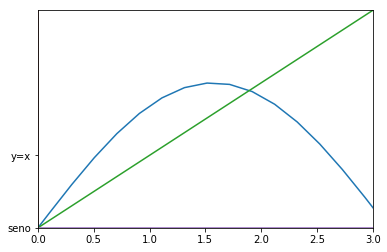

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# EXEMPLO: f(x)=x^2+x-3
x=np.linspace(-10,10,100)   # Estou a criar dados de input em X.
y=np.zeros((100,1))         # Estou a criar um vector de saida em Y.

i=0
while i < 100:
    y[i]= 2 * math.sin(x[i])     # Estou a atribuir a cada célula de Y
    i=i+1                   # o correspondente valor de X após passar por f(x)

# marker é o simbolo do marcador e color a cor do marcador.
plt.plot(x,y,'-', 'seno')   # estou a fazer o gráfico dos dois vectores.
plt.plot(x,x,'-', 'y=x')   # estou a fazer o gráfico dos dois vectores.
plt.plot([-10,10],[0,0],'-')  # Aqui estou a tentar criar linhas
plt.plot([0,0],[-20,100],'-') # para os eixos X e Y.

plt.ylim(0,3)  # Aqui estou a limitar a janela dos gráficos em Y.
plt.xlim(0,3)  # ... e em X.

plt.show()    # Esta linha de código serve para mostrar o gráfico total.



Analisando o gráfico acima, podemos perceber que a raiz das funções está em algum ponto onde o x esteja entre 1.5 e 2.0. 
Logo adotaremos esse intervalo para encontrar a raiz.
Os parâmetros de entrada do nosso método de bisseccao abaixo, são:
a - Valor inicial do intervalo - 1.5
b - Valor final do intervalo - 2.0
TOL - Tolerância, foi dada no enunciado como 10^-5
N - Número máximo de iterações que devem ser executadas - Defini como 30

In [4]:
import numpy
import math



def bisseccao(a, b, TOL, N):  
    f = lambda x: x -2 * math.sin(x)
    i = 1  
    fa = f(a)  
    while (i <= N):  
        #iteracao da bissecao  
        p = a + (b-a)/2  
        fp = f(p)  
        #condicao de parada  
        
        if ((fp == 0) or ((b-a)/2 < TOL)):  
            return p  
        #bissecta o intervalo  
        i = i+1  
        if (numpy.sign(fa) * numpy.sign(fp) > 0):  
            a = p  
            fa = fp  
        else:  
            b = p  
 
    raise NameError('Num. max. de iter. excedido!');

saida = bisseccao(1.8,2.0,pow(10,-5),40);
print(saida);

1.8954895019531248


(13) Encontre uma aproximação para $\sqrt[3]{25}$ com erro menor que $10^{-4}$ usando o Algoritmo da Bissecção. [Dica: Considere $f(x)=x^3-25$]

(19) Considere que {$p_n$} é a sequência definida por $p_n=\sum_{k=1}^{n} \frac{1}{k}$. Mostre que {$p_n$} diverge apesar do $\lim_{n\to \infty}(p_n-p_{n-1})=0$.


### Seção 2.1 DISCUSSION QUESTIONS - 3

Ele é sensível a valores iniciais. Apenas para comparar o metódo de newton é muito mais sensível a esse tipo de valores.

MIRANDA, Mario J.; FACKLER, Paul R. Lecture Notes In Computational Economic Dynamics. Unpublished, The Ohio State University, 1996.

'Erros iniciais são os cometidos no arredondamento dos dados iniciais. Os erros intermediários são
decorrentes dos erros cometidos durante a aplicação do método numérico e os erros finais decorrentes da
apresentação final do resultado.'

JOSÉ, Ionildo José Sanches Prof Ionildo; FURLAN, Diógenes Cogo. MÉTODOS NUMÉRICOS. 2006. Tese de Doutorado. Universidade Federal do Paraná.

## Iteração de Ponto Fixo ##

Um número $p$ é um **ponto fixo** de uma função $g$ se $g (p) = p$. 

### Teorema 2.2 ##
**a.** Se $g ∈ C [a,b], e g(x) ∈ [a,b]$, pata todo $x ∈ [a,b], g$ terá um ponto fixo em $[a,b]$.

**b.** Além disso, se $g'(x)$ existir em $(a,b)$ e existir uma constante positiva $k < 1$ com
<p style="text-align: center;"> $|g'(x)|≤ k$, para todo $x ∈ (a,b)$ <p>
    
então o ponto fixo em $[a,b]$ será único.

#### Demostração####

**a.** Se $g(a)=a$ ou $g(b)=b$, $g$ tem um ponto fixo em una extremidade. Caso contrário, $g(a) > a$ e $g(b) < b$. A função $h(x) = g(x) - x$ é contínua em $[a,b]$, com 

<p style="text-align: center;"> $h(a) = g(a) - a > 0$ e $h(b) = g(b) - b < 0$.<p>

O Teorema do Valor Intermediário implica a existência de $p ∈ (a,b)$ para o qual $h(p) = 0$. Esse número $p$ é um ponto fixo de $g$, uma vez que
<p style="text-align: center;"> $ 0 =h(p) = g(p) - p$ implica que $g(p) = p$ <p>

**b.** Suponha também que $g'(x) ≤ k < 1$ e que $p$ e $q$ sejam pontos fixos em $[a,b]$. Se $p ≠ q$, o Teorema do Valor Médio impliqca a existência de um número ε entre $p$ e $q$ e, portanto, em $[a,b]$, com 
<p style="text-align: center;"> $(g(p)-g(q))/(p-q) = g'(ε) $. 

PAra determinas a aproximação do ponto fixo de uma função $g$, escolhemos uma aproximação inicial $p_0$ e geramos a seqüência $[p_n]_{n=0}^{\infty}$, definido $p_n = g(p_n-1)$, para cada $n ≥ 1.$ Se a seqüência converfir para $p$ e $q$ for cntínua, então
<p style="text-align: center;"> $p = lim_{n\to\infty} g(p_n-1) = g(lim_{n\to\infty} p_n-1) = g(p)$, <p>
    
e será obtida uma solução para $x=g(x).$ Essa técnica é denominada **iteração de ponto fixo** ou **iteração funcional**. 

### Teorema 2.3 (Teorema do Ponto Fixo)###

Seja $g ∈ C[a,b]$ tal que $g(x) ∈ [a,b]$, para todo $x$ em $[a,b]$. Além disso, supoha que $g'$ exista em $(a,b)$ e que exista uma constante $0 < k < 1$ com 
<p style="text-align: center;">  $|g'(x)|≤ k$, para todo $x ∈ (a,b)$. <p>
    
Então, para qualquer número $p_0$ em $[a,b]$, a seqüência definida por
<p style="text-align: center;"> $p_n = g(p_n-1), n≥1$ <p>

converge para o único ponto fixo em $[a,b]$.






## Conjunto de exercícios 2.2 #

(9) Use o teorema 2.3 para mostrar que $g(x)=\pi+0.5. sen(\frac{x}{2})$ tem um ponto fixo único no intervalo [0,2$\pi$]. Use a iteração de ponto fixo para encontrar um valor aproximado do ponto fixo com erro menor que $10^{-2}$. Use o Corolário 2.5 para estimar o número de iterações necessárias para se alcançar a precisão de $10^{-2}$ e compare essa estimativa teórica com o número realmente necessário de iterações.


### (17) -  Use a fixed-point iteration method to determine a solution accurate to within 10 _2 forx = 2sin(7rx) + x = 0, for x on fl, 2]. Use po = 1.

In [5]:
from scipy import linalg, optimize
import numpy
import math


def ponto_fixo(N):
#funcao do pto. fixo  
    g = lambda x: x - ((pow(x,3) + 4*pow(x,2) - 10)/(3*pow(x,2)+8*x))
    #g = lambda x: - (2 * numpy.sign(math.pi * x))
    i = 1  
    p0 = 1.5
    TOL = pow(10,-2)
    while (i <= N): 
        p = g(p0)
        if (p - p0 < TOL):  
            print(i)
            return p  
        i = i +1
        p0 = p
    raise NameError('Num. max. de iter. excedido!');
 
ponto_fixo(500)

1


1.3733333333333333

(25) Substitua, no teorema 2.4 a consideração de que "um número positivo $k<1$ existe, com $|g'(x)|\leqslant k$" por "g satisfaz a condição de Lipschitz no intervalo $[a,b]$ com a constante de Lipschit $L<1$". (Veja o exercício 28 da seção 1.1). Mostre que as conclusões deste teorema continuam válidas. 

**Referências Bibliográficas**

BURDEN, R.L.;FAIRES,D.J.;BURDEN, A.M. **Numerical Analysis**. 10 ed. Boston, MA: Cengage Learning, 2014, cap. 2, p.47-66. ISBN 978-1-305-25366-7